In [22]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.model_selection import train_test_split

In [23]:
df=pd.read_csv("notes.csv")

In [24]:
df.head(10)

,nom,matiere,note
0,Laurent Dagenais,Français,16
1,Guy Marois,Français,13
2,Beaufort Lesage,Français,8
3,Russell Durand,Français,10
4,Alexis Riel,Français,15
5,Leon Lapresse,Français,17
6,Orville Routhier,Français,6
7,Agramant Pepin,Français,17
8,Aiglentina Lambert,Français,16
9,Theodore Clavet,Français,8


In [25]:
df.tail(10)

,nom,matiere,note
74,Florus Devoe,Physique/Chimie,15
75,Normand Arsenault,Physique/Chimie,9
76,Aceline Hughes,Physique/Chimie,10
77,Gaston Brisette,Physique/Chimie,12
78,Agate Grandbois,Physique/Chimie,17
79,Agrican Foucault,Physique/Chimie,9
80,Prunella Josseaume,Physique/Chimie,6
81,Yseult Charest,Physique/Chimie,16
82,Dorothee Aupry,Physique/Chimie,17
83,Amaury Reault,Physique/Chimie,8


In [26]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
note,84.0,11.666667,4.308393,5.0,8.0,11.5,16.0,19.0


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   nom      84 non-null     object
 1   matiere  84 non-null     object
 2   note     84 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 2.1+ KB


In [28]:
df.isnull().sum()

nom        0
matiere    0
note       0
dtype: int64

In [29]:
duplicated_name=df["nom"].duplicated().sum()
duplicated_name

np.int64(63)

In [30]:
df.iloc[63,0]

'Laurent Dagenais'

In [31]:
df.iloc[60:70,:]

,nom,matiere,note
60,Yseult Charest,Biologie,13
61,Dorothee Aupry,Biologie,16
62,Amaury Reault,Biologie,7
63,Laurent Dagenais,Physique/Chimie,13
64,Guy Marois,Physique/Chimie,11
65,Beaufort Lesage,Physique/Chimie,18
66,Russell Durand,Physique/Chimie,7
67,Alexis Riel,Physique/Chimie,11
68,Leon Lapresse,Physique/Chimie,17
69,Orville Routhier,Physique/Chimie,9


In [32]:
df.loc[df["nom"]=="Russell Durand"]

,nom,matiere,note
3,Russell Durand,Français,10
24,Russell Durand,Mathématiques,5
45,Russell Durand,Biologie,12
66,Russell Durand,Physique/Chimie,7


In [33]:
df["note"].isna().sum()

np.int64(0)

In [34]:
mask=df["note"].isna().sum()
df.loc[mask,:].T

nom        Laurent Dagenais
matiere            Français
note                     16
Name: 0, dtype: object

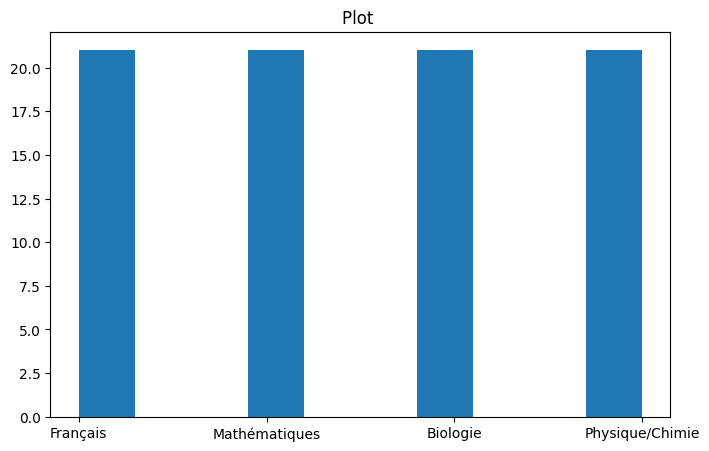

In [35]:

plt.figure(figsize=(8,5))
plt.hist(x=df.matiere, label=df.note.mean())
plt.title("Plot ")
plt.show()

In [36]:
df.corr

<bound method DataFrame.corr of                    nom          matiere  note
0     Laurent Dagenais         Français    16
1           Guy Marois         Français    13
2      Beaufort Lesage         Français     8
3       Russell Durand         Français    10
4          Alexis Riel         Français    15
..                 ...              ...   ...
79    Agrican Foucault  Physique/Chimie     9
80  Prunella Josseaume  Physique/Chimie     6
81      Yseult Charest  Physique/Chimie    16
82      Dorothee Aupry  Physique/Chimie    17
83       Amaury Reault  Physique/Chimie     8

[84 rows x 3 columns]>

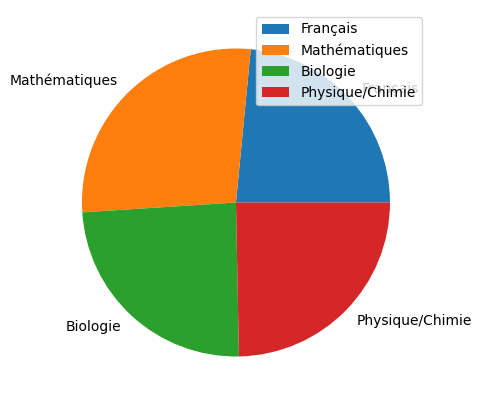

In [37]:
plt.figure(figsize=(8,5))
plt.pie(x=df.groupby(["matiere"])["note"].mean(), labels=df["matiere"].unique())
plt.legend()
plt.show()